In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
data = pd.read_csv("NLSY97_subset.csv")
var_desc = pd.read_csv("NLSY97_Variable_Names_and_Descriptions.csv")

data.head()


,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.711538,0,1,1984,27,24.0,64000.0,...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.711538,0,1,1982,29,32.0,6000.0,...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.942307,0,1,1981,30,23.0,88252.0,...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.538462,0,1,1983,28,30.0,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.942308,0,1,1984,27,23.0,44188.0,...,1,0,0,0,1,0,0,1,0,0


In [4]:
var_desc.head(10)


,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
5,ETHHISP,D,Hispanic
6,ETHWHITE,D,"Non-black, non-hispanic"
7,NaN,NaN,NaN
8,AGE,C,Age in 2011
9,BYEAR,C,Year of birth


In [5]:
data.shape


(2000, 96)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

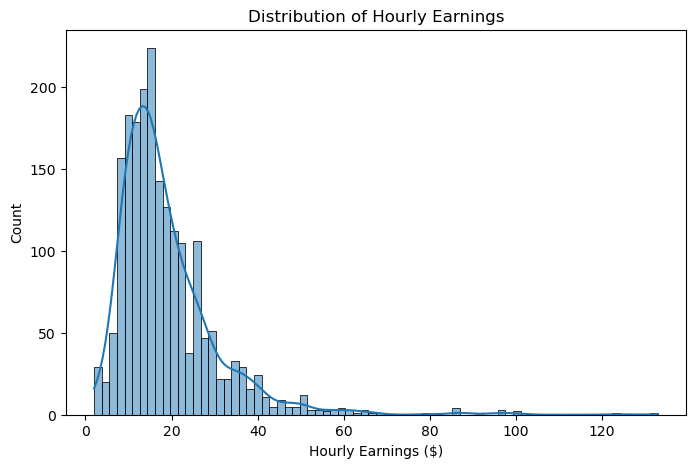

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(data["EARNINGS"], kde=True)
plt.title("Distribution of Hourly Earnings")
plt.xlabel("Hourly Earnings ($)")
plt.show()


In [8]:
features = [
    "S",
    "EXP",
    "TENURE",
    "AGE",
    "HOURS",
    "FEMALE",
    "ETHBLACK",
    "ETHHISP",
    "ASVABC",
    "HHINC97"
]

X = data[features]
y = data["EARNINGS"]


In [9]:
dataset = pd.concat([X, y], axis=1).dropna()

X = dataset[features]
y = dataset["EARNINGS"]


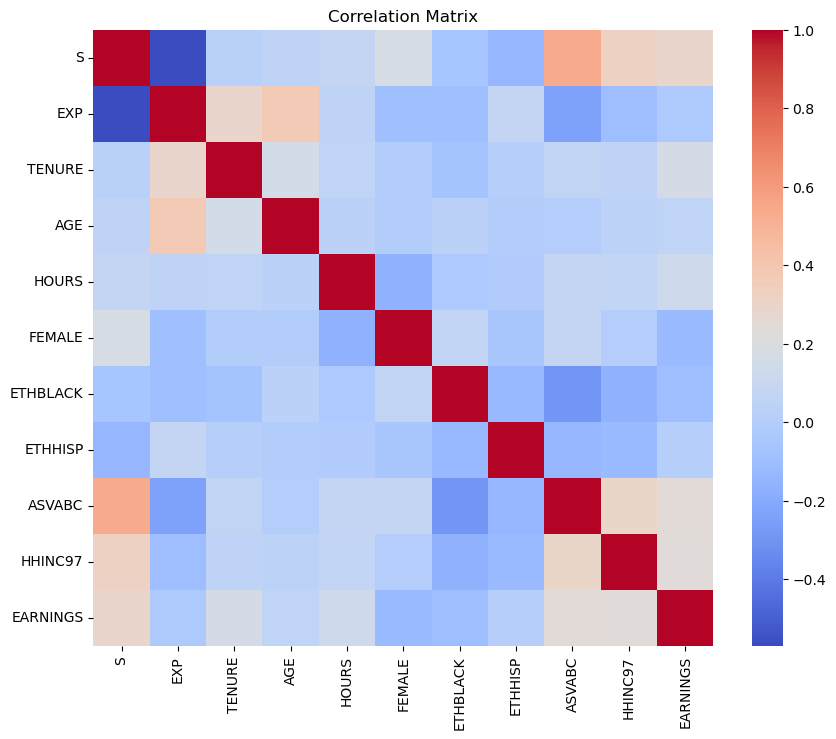

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
coeff_df = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df


,Variable,Coefficient
7,ETHHISP,2.542361
0,S,1.507324
8,ASVABC,0.942044
1,EXP,0.649119
2,TENURE,0.477234
4,HOURS,0.092927
9,HHINC97,0.000033
6,ETHBLACK,-0.064811
3,AGE,-0.391963
5,FEMALE,-4.149224


In [14]:
y_pred = model.predict(X_test)


In [15]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(6.736610807981051, 9.919291381757274, 0.050062047555480715)

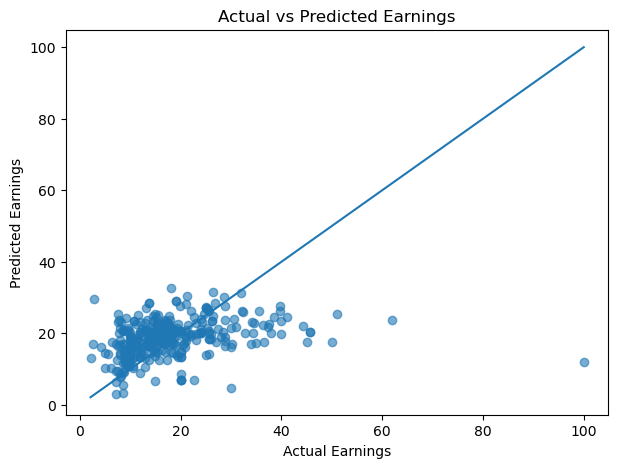

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Earnings")
plt.ylabel("Predicted Earnings")
plt.title("Actual vs Predicted Earnings")
plt.show()
